In [172]:
import tensorflow as tf
import keras
from tensorflow.keras import models,Sequential,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import shutil
from numpy import ceil
import matplotlib.pyplot as plt
import glob

In [111]:
base_path='F:\datasets\Primary Dataset'
test=os.path.join(base_path,'test')
train=os.path.join(base_path,'train')
train_smut=os.path.join(train,'Smut')
train_blast=os.path.join(train,'Blast')
train_Health=os.path.join(train,'Healthy')
test_smut=os.path.join(test,'Smut')
test_blast=os.path.join(test,'Blast')
test_Health=os.path.join(test,'Healthy')
train_smut_num=len(os.listdir(train_smut) )
train_Health_num=len(os.listdir(train_Health) )
train_Blast_num=len(os.listdir(train_blast) )
test_smut_num=len(os.listdir(test_smut) )
test_Health_num=len(os.listdir(test_Health) )
test_Blast_num=len(os.listdir(test_blast) )
total_test_num=test_Blast_num+test_Health_num+test_smut_num
total_train_num=train_Blast_num+train_Health_num+train_smut_num

print(total_test_num)
print(total_train_num)

47
143


In [114]:
img_size = 150
train_image_generator = ImageDataGenerator(rescale=1. / 255.0,
                                           rotation_range=0.2,
                                           vertical_flip=True,
                                           zoom_range=0.2,
                                           shear_range=0.2,
                                           height_shift_range=0.2,
                                           fill_mode='nearest')
test_image_generator = ImageDataGenerator(rescale=1. / 255.0)


In [124]:
train_data_gen = train_image_generator.flow_from_directory(
    train,
    batch_size=32,
    shuffle=True,
    target_size=(img_size, img_size),
    class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
    directory=test,
    shuffle=True,
    batch_size=32,
    target_size=(img_size, img_size),
    class_mode='binary')

Found 143 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [152]:
shape=img_size,img_size,3
model = models.Sequential()
model.add(
    layers.Conv2D(32, (3, 3),
                  activation='relu',
                  input_shape=(shape)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)           

In [155]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [168]:
history=model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train_num/32.0)),epochs=50,validation_steps=int(np.ceil(total_test_num/32.0)),validation_data=test_data_gen)

Epoch 1/50
5/5 [==============================] - 1s 209ms/step - loss: 0.2862 - accuracy: 0.8741 - val_loss: 1.0719 - val_accuracy: 0.7234
Epoch 2/50
5/5 [==============================] - 1s 190ms/step - loss: 0.2715 - accuracy: 0.9161 - val_loss: 1.0912 - val_accuracy: 0.6809
Epoch 3/50
5/5 [==============================] - 1s 207ms/step - loss: 0.2447 - accuracy: 0.8811 - val_loss: 1.1274 - val_accuracy: 0.6383
Epoch 4/50
5/5 [==============================] - 1s 195ms/step - loss: 0.2201 - accuracy: 0.9371 - val_loss: 1.3234 - val_accuracy: 0.5957
Epoch 5/50
5/5 [==============================] - 1s 219ms/step - loss: 0.3039 - accuracy: 0.8951 - val_loss: 1.3152 - val_accuracy: 0.5957
Epoch 6/50
5/5 [==============================] - 1s 200ms/step - loss: 0.2303 - accuracy: 0.9091 - val_loss: 1.2944 - val_accuracy: 0.5745
Epoch 7/50
5/5 [==============================] - 1s 206ms/step - loss: 0.2779 - accuracy: 0.8881 - val_loss: 0.9642 - val_accuracy: 0.7447
Epoch 8/50
5/5 [====

Text(0.5, 1.0, 'Training and Validation Accuracy')

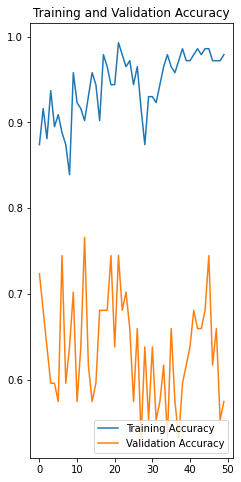

In [175]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')